# **Red and White Wine Quality**

## The Data
For this example, we will be using a wine quality dataset from CMU that includes essential ground truth causal information. This dataset contains 12 features inclusing the output feature.

1.  fixed acidity
2.  volatile acidity
3.  citric acid
4.  residual sugar
5.  chlorides
6.  free sulfur dioxide
7.  total sulfur dioxide
8.  density
9.  pH
10.  sulphates
11.  alcohol
12.  quality (score between 0 and 10) **Output variable**

We know from external sources that the ground truth DAG must have at least edges from both `alcohol` and `total_sulfur_dioxide` to quality. We also know that edges between the features are possible.

In [1]:
!pip install dowhy
!pip install lingam
!pip install igraph
!pip install factor_analyzer
!pip install econml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 287 kB 10.8 MB/s 
  Attempting uninstall: pydot
    Found existing installation: pydot 1.3.0
    Uninstalling pydot-1.3.0:
      Successfully uninstalled pydot-1.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 79 kB 5.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.1 MB 8.5 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 41 kB 575 kB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.4.0-py3-none-any.whl size=41455 sha256=81f5e11017d1d1de9464d85d82db423d198479e0934a8cc999bd17cf0dd8eee0
  Stored in directory: /root/.cache/pip/wheels/ac/00/37/1f0e8

In [2]:
import numpy as np
import pandas as pd

from dowhy import CausalModel
import dowhy.causal_refuters as causal_refuters
import dowhy.datasets
import dowhy.api

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LassoCV
from sklearn.ensemble import GradientBoostingRegressor

from statsmodels.api import OLS

import matplotlib.pyplot as plt

import warnings
warnings.simplefilter('ignore')
import graphviz
import lingam
from lingam.utils import make_prior_knowledge

In [3]:
# Read in the Red and White Wine Quality data set from repo
red_data = pd.read_csv("https://raw.githubusercontent.com/zygmuntz/wine-quality/master/winequality/winequality-red.csv", sep=None)
white_data = pd.read_csv("https://raw.githubusercontent.com/shrikant-temburwar/Wine-Quality-Dataset/master/winequality-white.csv", sep=None)

# Display the first 5 elements of the data
red_data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# Display the first 5 elements of the data
white_data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


If you recall, our domain knowedge tells us that there are two edges we know to exist in real life. while the causal discovery algorithm certainly helps

In [5]:
#Checking to see if there are any null values in the dataset
print("Red wine dataset\n", red_data.isnull().sum())
print("\nWhite wine dataset\n", white_data.isnull().sum())

Red wine dataset
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

White wine dataset
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


### Fixed Acidity vs Quality for Red and White Wine

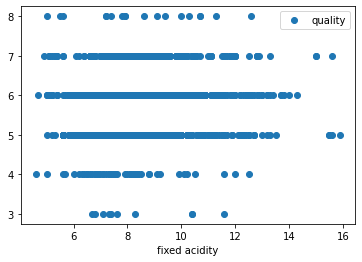

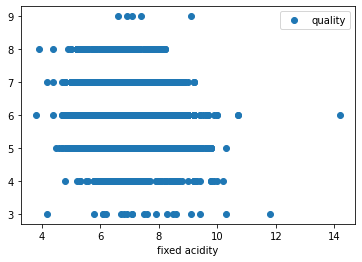

In [6]:
red_data.plot(x='fixed acidity', y='quality', style='o')
white_data.plot(x='fixed acidity', y='quality', style='o')

### Citric Acid vs Quality for Red and White Wine

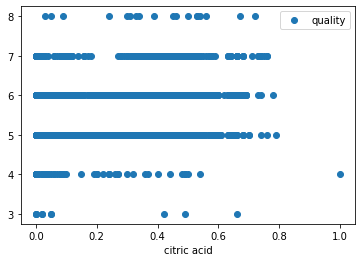

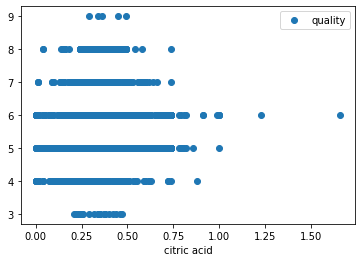

In [7]:
red_data.plot(x='citric acid', y='quality', style='o')
white_data.plot(x='citric acid', y='quality', style='o')

### Volatile Acidity vs Quality for Red and White Wine

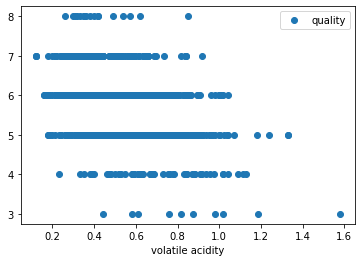

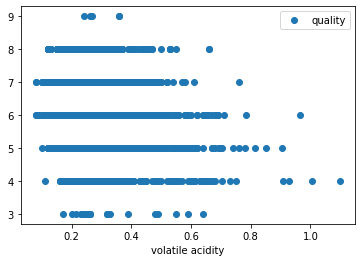

In [8]:
red_data.plot(x='volatile acidity', y='quality', style='o')
white_data.plot(x='volatile acidity', y='quality', style='o')

### Alcohol vs Quality for Red and White Wine

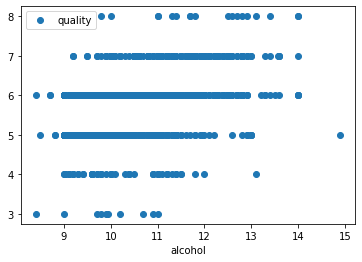

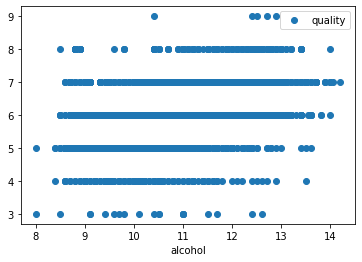

In [9]:
red_data.plot(x='alcohol', y='quality', style='o')
white_data.plot(x='alcohol', y='quality', style='o')

##**RED WINE QUALITY**

1. Make Prior Knowledge - is a fucntion that returns the number of columns and the sink varible which is 'quality' in this case in an array format
2.  DirectLinGAM estimates a causal ordering of variables and provide a full DAG for the dataset given
3. We will get the adjacency matrix from the provided DAG and try to print the graph

In [10]:
pk = make_prior_knowledge(
    n_variables=len(red_data.columns),
    sink_variables=[11])

model = lingam.DirectLiNGAM(prior_knowledge=pk)
model.fit(red_data)
adjacency_matrix = model.adjacency_matrix_
#weights of the edges from one node to the other
adjacency_matrix

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 8.15985312e-03,  0.00000000e+00, -6.70661173e-01,
         0.00000000e+00,  6.01617054e-01, -2.90417151e-03,
         1.12708140e-03,  1.91868127e+01,  0.00000000e+00,
         0.00000000e+00,  7.41870732e-03,  0.00000000e+00],
       [ 9.41859630e-02,  0.00000000e+00,  0.00000000e+00,
         1.64684531e-02,  6.96856473e-01, -1.36290770e-03,
         9.94611752e-04, -2.96361088e+01,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 9.29454176e-02,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.0000000

Here, we can see the two arrays that show the directed edges in the graph. So the edges would be 2 -> 1, 4 -> 1. etc

In [11]:
idx = np.abs(adjacency_matrix) > 0.01
dirs = np.where(idx)
dirs

(array([ 1,  1,  1,  2,  2,  2,  2,  3,  4,  5,  5,  6,  6,  8,  8,  8,  8,
         8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 11,
        11, 11, 11, 11]),
 array([ 2,  4,  7,  0,  3,  4,  7,  0,  7,  0,  3,  3,  5,  0,  1,  2,  3,
         4,  7,  9, 10,  0,  1,  2,  3,  4,  7, 10,  0,  2,  3,  4,  7,  1,
         4,  8,  9, 10]))

['0. fixed acidity', '1. volatile acidity', '2. citric acid', '3. residual sugar', '4. chlorides', '5. free sulfur dioxide', '6. total sulfur dioxide', '7. density', '8. pH', '9. sulphates', '10. alcohol', '11. quality']


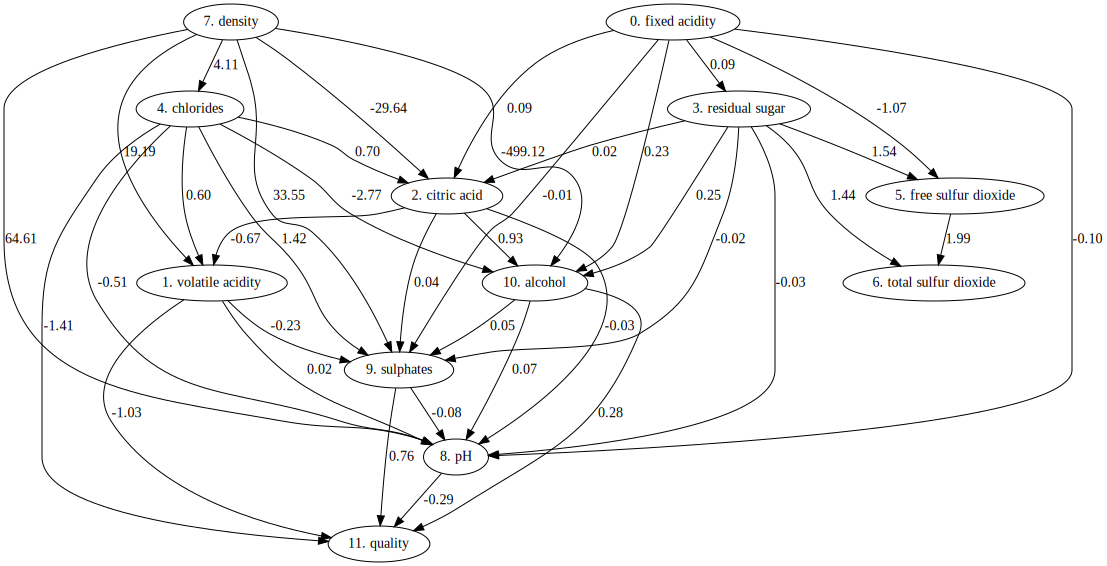

In [12]:
labels = [f'{i}. {col}' for i, col in enumerate(red_data.columns)]
print(labels)

dag = graphviz.Digraph(engine='dot')
names = labels if labels else [f'x{i}' for i in range(len(adjacency_matrix))]
for to, from_, coef in zip(dirs[0], dirs[1], adjacency_matrix[idx]):
          dirs = np.where(idx)
          dag.edge(names[from_], names[to], label=f'{coef:.2f}')
    
dag

In [13]:
print(dag.source)

digraph {
	"2. citric acid" -> "1. volatile acidity" [label=-0.67]
	"4. chlorides" -> "1. volatile acidity" [label=0.60]
	"7. density" -> "1. volatile acidity" [label=19.19]
	"0. fixed acidity" -> "2. citric acid" [label=0.09]
	"3. residual sugar" -> "2. citric acid" [label=0.02]
	"4. chlorides" -> "2. citric acid" [label=0.70]
	"7. density" -> "2. citric acid" [label=-29.64]
	"0. fixed acidity" -> "3. residual sugar" [label=0.09]
	"7. density" -> "4. chlorides" [label=4.11]
	"0. fixed acidity" -> "5. free sulfur dioxide" [label=-1.07]
	"3. residual sugar" -> "5. free sulfur dioxide" [label=1.54]
	"3. residual sugar" -> "6. total sulfur dioxide" [label=1.44]
	"5. free sulfur dioxide" -> "6. total sulfur dioxide" [label=1.99]
	"0. fixed acidity" -> "8. pH" [label=-0.10]
	"1. volatile acidity" -> "8. pH" [label=0.02]
	"2. citric acid" -> "8. pH" [label=-0.03]
	"3. residual sugar" -> "8. pH" [label=-0.03]
	"4. chlorides" -> "8. pH" [label=-0.51]
	"7. density" -> "8. pH" [label=64.61]
	"9.

##**Modeling**

In [14]:
model = CausalModel(
    data = red_data,
    treatment = ['pH'],
    outcome = ['quality'],
    common_causes = ['fixed acidity', 'volatile acidity', 'citric acid'],
    instruments = ['residual sugar'])

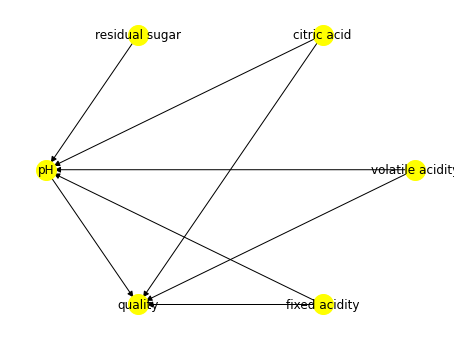

In [15]:
model.view_model()

##**Identification**

In [16]:
#2 Identify
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)

Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d                                                                   
─────(Expectation(quality|volatile acidity,fixed acidity,citric acid))
d[pH]                                                                 
Estimand assumption 1, Unconfoundedness: If U→{pH} and U→quality then P(quality|pH,volatile acidity,fixed acidity,citric acid,U) = P(quality|pH,volatile acidity,fixed acidity,citric acid)

### Estimand : 2
Estimand name: iv
Estimand expression:
Expectation(Derivative(quality, [residual sugar])*Derivative([pH], [residual s
ugar])**(-1))
Estimand assumption 1, As-if-random: If U→→quality then ¬(U →→{residual sugar})
Estimand assumption 2, Exclusion: If we remove {residual sugar}→{pH}, then ¬({residual sugar}→quality)

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



##**Estimation**

+ This step involves building an estimator and computes the target estimand identified in 'Identification'

In [17]:
#Cannot use propensity score
estimate = model.estimate_effect(identified_estimand,
                                 method_name="backdoor.linear_regression")

print(estimate)

linear_regression
{'control_value': 0, 'treatment_value': 1, 'test_significance': None, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}
*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d                                                                   
─────(Expectation(quality|volatile acidity,fixed acidity,citric acid))
d[pH]                                                                 
Estimand assumption 1, Unconfoundedness: If U→{pH} and U→quality then P(quality|pH,volatile acidity,fixed acidity,citric acid,U) = P(quality|pH,volatile acidity,fixed acidity,citric acid)

## Realized estimand
b: quality~pH+volatile acidity+fixed acidity+citric acid
Target units: ate

## Estimate
Mean value: 0.49785413803665524



In [18]:
dml_estimate = model.estimate_effect(identified_estimand, 
                                    method_name="backdoor.econml.dml.DML",
                                    method_params={
                                        'init_params': {'model_y':GradientBoostingRegressor(),
                                                        'model_t': GradientBoostingRegressor(),
                                                        'model_final':LassoCV(fit_intercept=False), },
                                        'fit_params': {}
                                     })
print(dml_estimate)

*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d                                                                   
─────(Expectation(quality|volatile acidity,fixed acidity,citric acid))
d[pH]                                                                 
Estimand assumption 1, Unconfoundedness: If U→{pH} and U→quality then P(quality|pH,volatile acidity,fixed acidity,citric acid,U) = P(quality|pH,volatile acidity,fixed acidity,citric acid)

## Realized estimand
b: quality~pH+volatile acidity+fixed acidity+citric acid | 
Target units: ate

## Estimate
Mean value: 0.0
Effect estimates: [0. 0. 0. ... 0. 0. 0.]



##**Refute**

Next we check the robustness of the estimate using a Random Cause and Placebo refutation test. In this test, a random cause is added to check if the estimate is same

In [19]:
random_refute_results = model.refute_estimate(identified_estimand, estimate,
                                       method_name="random_common_cause")
print(random_refute_results)

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate

+ In this test, the treatment is replaced by an independent random variable (while preserving the correlation with the instrument), so that the true causal effect should be zero. We check if our estimator also provides the correct answer of zero.

In [20]:
placebo_refute_results = model.refute_estimate(identified_estimand, estimate,
                                       method_name="placebo_treatment_refuter")
print(placebo_refute_results)

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate

Refutation shows that there is no threat from unaccounted confounders since the effect on treatment is low.

##**WHITE WINE QUALITY**

In [21]:
pk = make_prior_knowledge(
    n_variables=len(white_data.columns),
    sink_variables=[11])

model = lingam.DirectLiNGAM(prior_knowledge=pk)
model.fit(white_data)
adjacency_matrix = model.adjacency_matrix_
#weights of the edges from one node to the other
adjacency_matrix

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.48109002e-02,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-2.13809978e-02,  0.00000000e+00,  0.00000000e+00,
        -3.93922692e-03,  3.98619736e-01, -1.49643003e-03,
         6.52825642e-04,  1.63169680e+01, -9.09270724e-02,
        -6.60179464e-02,  3.61405607e-02,  0.00000000e+00],
       [ 2.67326549e-02, -2.06136377e-01,  0.00000000e+00,
        -3.54258976e-03,  6.10115433e-01,  3.22413481e-04,
         1.60412176e-04,  1.34721022e+01, -9.08381562e-02,
         4.28578974e-02,  2.38015458e-02,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-3.74358870e-04,  0.00000000e+00,  0.0000000

In [22]:
idx = np.abs(adjacency_matrix) > 0.01
dirs = np.where(idx)
dirs

(array([ 0,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  5,  5,  5,
         5,  5,  6,  6,  6,  6,  8,  8,  8, 10, 10, 11, 11, 11, 11, 11, 11,
        11, 11]),
 array([ 3,  0,  4,  7,  8,  9, 10,  0,  1,  4,  7,  8,  9, 10,  0,  3,  6,
         9, 10,  0,  3,  9, 10,  0,  4,  9,  0,  3,  0,  1,  3,  4,  7,  8,
         9, 10]))

['0. fixed acidity', '1. volatile acidity', '2. citric acid', '3. residual sugar', '4. chlorides', '5. free sulfur dioxide', '6. total sulfur dioxide', '7. density', '8. pH', '9. sulphates', '10. alcohol', '11. quality']


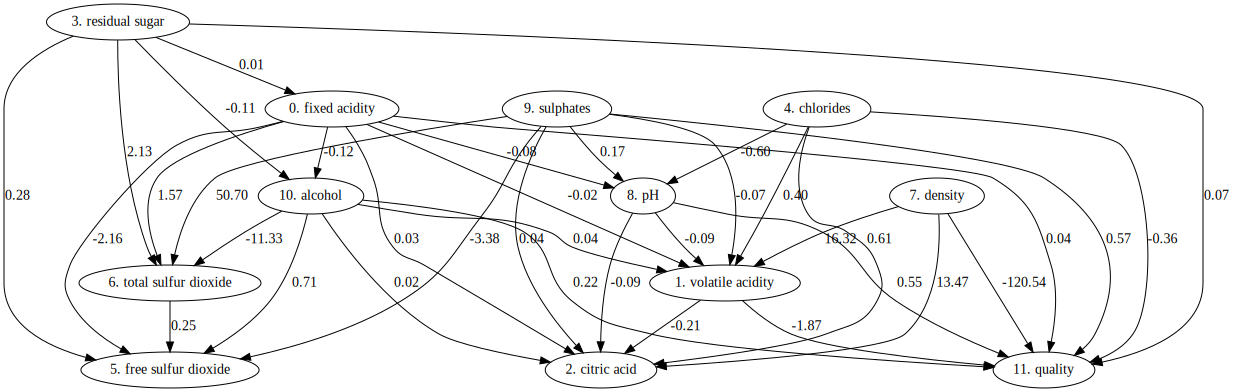

In [23]:
labels = [f'{i}. {col}' for i, col in enumerate(white_data.columns)]
print(labels)

dag = graphviz.Digraph(engine='dot')
names = labels if labels else [f'x{i}' for i in range(len(adjacency_matrix))]
for to, from_, coef in zip(dirs[0], dirs[1], adjacency_matrix[idx]):
          dirs = np.where(idx)
          dag.edge(names[from_], names[to], label=f'{coef:.2f}')

dag

In [24]:
print(dag.source)

digraph {
	"3. residual sugar" -> "0. fixed acidity" [label=0.01]
	"0. fixed acidity" -> "1. volatile acidity" [label=-0.02]
	"4. chlorides" -> "1. volatile acidity" [label=0.40]
	"7. density" -> "1. volatile acidity" [label=16.32]
	"8. pH" -> "1. volatile acidity" [label=-0.09]
	"9. sulphates" -> "1. volatile acidity" [label=-0.07]
	"10. alcohol" -> "1. volatile acidity" [label=0.04]
	"0. fixed acidity" -> "2. citric acid" [label=0.03]
	"1. volatile acidity" -> "2. citric acid" [label=-0.21]
	"4. chlorides" -> "2. citric acid" [label=0.61]
	"7. density" -> "2. citric acid" [label=13.47]
	"8. pH" -> "2. citric acid" [label=-0.09]
	"9. sulphates" -> "2. citric acid" [label=0.04]
	"10. alcohol" -> "2. citric acid" [label=0.02]
	"0. fixed acidity" -> "5. free sulfur dioxide" [label=-2.16]
	"3. residual sugar" -> "5. free sulfur dioxide" [label=0.28]
	"6. total sulfur dioxide" -> "5. free sulfur dioxide" [label=0.25]
	"9. sulphates" -> "5. free sulfur dioxide" [label=-3.38]
	"10. alcohol" 

## **Modeling**

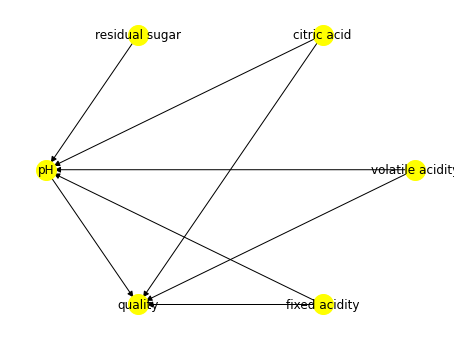

In [25]:
model= CausalModel(
        data = white_data,
        treatment='pH',
        outcome='quality',
        common_causes=['fixed acidity', 'volatile acidity', 'citric acid'],
        instruments=['residual sugar'])
model.view_model()

##**Identification**

In [26]:
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)

Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d                                                                   
─────(Expectation(quality|volatile acidity,fixed acidity,citric acid))
d[pH]                                                                 
Estimand assumption 1, Unconfoundedness: If U→{pH} and U→quality then P(quality|pH,volatile acidity,fixed acidity,citric acid,U) = P(quality|pH,volatile acidity,fixed acidity,citric acid)

### Estimand : 2
Estimand name: iv
Estimand expression:
Expectation(Derivative(quality, [residual sugar])*Derivative([pH], [residual s
ugar])**(-1))
Estimand assumption 1, As-if-random: If U→→quality then ¬(U →→{residual sugar})
Estimand assumption 2, Exclusion: If we remove {residual sugar}→{pH}, then ¬({residual sugar}→quality)

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



## **Estimation**

In [27]:
estimate = model.estimate_effect(identified_estimand,
                                 method_name="backdoor.linear_regression")

print(estimate)

linear_regression
{'control_value': 0, 'treatment_value': 1, 'test_significance': None, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}
*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d                                                                   
─────(Expectation(quality|volatile acidity,fixed acidity,citric acid))
d[pH]                                                                 
Estimand assumption 1, Unconfoundedness: If U→{pH} and U→quality then P(quality|pH,volatile acidity,fixed acidity,citric acid,U) = P(quality|pH,volatile acidity,fixed acidity,citric acid)

## Realized estimand
b: quality~pH+volatile acidity+fixed acidity+citric acid
Target units: ate

## Estimate
Mean value: 0.3066029732686948



In [28]:
dml_estimate = model.estimate_effect(identified_estimand, 
                                    method_name="backdoor.econml.dml.DML",
                                    method_params={
                                        'init_params': {'model_y':GradientBoostingRegressor(),
                                                        'model_t': GradientBoostingRegressor(),
                                                        'model_final':LassoCV(fit_intercept=False), },
                                        'fit_params': {}
                                     })
dml_estimate

## **Refute**

In [29]:
random_refute_results = model.refute_estimate(identified_estimand, estimate,
                                       method_name="random_common_cause")
print(random_refute_results)

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate

In [30]:
refute_results_placebo = model.refute_estimate(identified_estimand, estimate,
                                       method_name="placebo_treatment_refuter")
print(refute_results_placebo)

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate

We see similar results to that of red wine quality in white wine where, the new effect on treatment is low and close to zero. We were able to successfully check the robustness of an estimate against unverified assumptions. 